## Loading libraries

In [51]:
import pandas as pd
import numpy as np
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import sys
import plotly.plotly as py
import plotly.graph_objs as go
import warnings
from scipy import stats #scientific kit (mathematics, data transformation & machine learning models)
from scipy.stats.mstats import normaltest, skewtest, kurtosistest, skew, kurtosis
import statsmodels #library for models
import seaborn as sns #Used for plotting statistical data
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn import svm
import psycopg2 # python library for postgres database (NoSQL- not only SQL) 
import plotly
import plotly.dashboard_objs as dashboard
import IPython.display
from IPython.display import Image
plotly.tools.set_credentials_file(username='Majel45', api_key='SToj7qOWO9iQBbvgiZqp')
# purpose to create a database is to store data

In [2]:
warnings.filterwarnings("ignore") 

## Importing data

In [3]:
training_df = pd.read_csv("trainingData.csv")
validation_df = pd.read_csv("validationData.csv")

In [4]:
training_df.shape

(19937, 529)

In [5]:
training_df.describe()

,WAP001,WAP002,WAP003,WAP004,WAP005,WAP006,WAP007,WAP008,WAP009,WAP010,...,WAP520,LONGITUDE,LATITUDE,FLOOR,BUILDINGID,SPACEID,RELATIVEPOSITION,USERID,PHONEID,TIMESTAMP
count,19937.000000,19937.000000,19937.0,19937.0,19937.000000,19937.000000,19937.000000,19937.000000,19937.000000,19937.000000,...,19937.0,19937.000000,1.993700e+04,19937.000000,19937.000000,19937.000000,19937.000000,19937.000000,19937.000000,1.993700e+04
mean,99.823644,99.820936,100.0,100.0,99.613733,97.130461,94.733661,93.820234,94.693936,99.163766,...,100.0,-7464.275947,4.864871e+06,1.674575,1.212820,148.429954,1.833024,9.068014,13.021869,1.371421e+09
std,5.866842,5.798156,0.0,0.0,8.615657,22.931890,30.541335,33.010404,30.305084,12.634045,...,0.0,123.402010,6.693318e+01,1.223078,0.833139,58.342106,0.372964,4.988720,5.362410,5.572054e+05
min,-97.000000,-90.000000,100.0,100.0,-97.000000,-98.000000,-99.000000,-98.000000,-98.000000,-99.000000,...,100.0,-7691.338400,4.864746e+06,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.369909e+09
25%,100.000000,100.000000,100.0,100.0,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,...,100.0,-7594.737000,4.864821e+06,1.000000,0.000000,110.000000,2.000000,5.000000,8.000000,1.371056e+09
50%,100.000000,100.000000,100.0,100.0,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,...,100.0,-7423.060900,4.864852e+06,2.000000,1.000000,129.000000,2.000000,11.000000,13.000000,1.371716e+09
75%,100.000000,100.000000,100.0,100.0,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,...,100.0,-7359.193000,4.864930e+06,3.000000,2.000000,207.000000,2.000000,13.000000,14.000000,1.371721e+09
max,100.000000,100.000000,100.0,100.0,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,...,100.0,-7300.818990,4.865017e+06,4.000000,2.000000,254.000000,2.000000,18.000000,24.000000,1.371738e+09


## Drop Duplicates from Dataset

In [6]:
training_df = training_df.drop_duplicates(subset=None, keep='first', inplace=False)

In [7]:
training_df.shape

(19300, 529)

In [8]:
training_df.head(10)

,WAP001,WAP002,WAP003,WAP004,WAP005,WAP006,WAP007,WAP008,WAP009,WAP010,...,WAP520,LONGITUDE,LATITUDE,FLOOR,BUILDINGID,SPACEID,RELATIVEPOSITION,USERID,PHONEID,TIMESTAMP
0,100,100,100,100,100,100,100,100,100,100,...,100,-7541.264300,4.864921e+06,2,1,106,2,2,23,1371713733
1,100,100,100,100,100,100,100,100,100,100,...,100,-7536.621200,4.864934e+06,2,1,106,2,2,23,1371713691
2,100,100,100,100,100,100,100,-97,100,100,...,100,-7519.152400,4.864950e+06,2,1,103,2,2,23,1371714095
3,100,100,100,100,100,100,100,100,100,100,...,100,-7524.570400,4.864934e+06,2,1,102,2,2,23,1371713807
4,100,100,100,100,100,100,100,100,100,100,...,100,-7632.143600,4.864982e+06,0,0,122,2,11,13,1369909710
5,100,100,100,100,100,100,100,100,100,100,...,100,-7533.896200,4.864939e+06,2,1,105,2,2,23,1371713841
6,100,100,100,100,100,100,100,100,100,100,...,100,-7519.152400,4.864950e+06,2,1,103,2,2,23,1371713883
7,100,100,100,100,100,100,100,100,100,100,...,100,-7527.451100,4.864929e+06,2,1,101,2,2,23,1371713775
8,100,100,100,100,100,100,100,100,100,100,...,100,-7559.497300,4.864888e+06,2,1,112,2,2,23,1371714307
9,100,100,100,100,100,100,100,100,100,100,...,100,-7510.437173,4.864949e+06,2,1,103,1,2,23,1371714128


## Setting Timestamp

In [9]:
#The unix time stamp is a way to track time as a running total of seconds. This count starts at the Unix Epoch 
#on January 1st, 1970 at UTC. Therefore, the unix time stamp is merely the number of seconds between a particular 
#date and the Unix Epoch
training_df['TIMESTAMP'] = pd.to_datetime(training_df['TIMESTAMP'] , unit='s')
validation_df['TIMESTAMP'] = pd.to_datetime(validation_df['TIMESTAMP'] , unit='s')

In [10]:
training_df['TIMESTAMP'].head(3)

0   2013-06-20 07:35:33
1   2013-06-20 07:34:51
2   2013-06-20 07:41:35
Name: TIMESTAMP, dtype: datetime64[ns]

## Data normalisation & visualisation

In [11]:
# Response variables in our problem are Building, Floor, Latitude, Longitude and Relative Position
(training_df[['FLOOR','BUILDINGID', 'SPACEID','RELATIVEPOSITION','USERID','PHONEID']]
.astype(str)
.describe(include=['object']))

,FLOOR,BUILDINGID,SPACEID,RELATIVEPOSITION,USERID,PHONEID
count,19300,19300,19300,19300,19300,19300
unique,5,3,123,2,18,16
top,3,2,202,2,11,14
freq,5041,9116,484,15991,4516,4827


In [12]:
#Split dependant variables (long, lat, floor, building, space, position) from independant variables (WAP's)
X_train = training_df.iloc[:,:520] #iloc is index location i.e. row number #get all rows for columns until 520
X_validation = validation_df.iloc[:,:520] 

Y_train = training_df.iloc[:,520:526] #get all the columns from 520 to 526
Y_validation = validation_df.iloc[:,520:526]

In [13]:
X_train.head(2)

,WAP001,WAP002,WAP003,WAP004,WAP005,WAP006,WAP007,WAP008,WAP009,WAP010,...,WAP511,WAP512,WAP513,WAP514,WAP515,WAP516,WAP517,WAP518,WAP519,WAP520
0,100,100,100,100,100,100,100,100,100,100,...,100,100,100,100,100,100,100,100,100,100
1,100,100,100,100,100,100,100,100,100,100,...,100,100,100,100,100,100,100,100,100,100


In [14]:
#Removing all WAP's +100 as they are not detected, and they interfer with the analysis
X_train = (X_train
             .replace(to_replace=100,value=np.nan))

# Perform the same transform on Test data
X_validation = (X_validation
             .replace(to_replace=100,value=np.nan))

In [15]:
X_stack = X_train.stack(dropna=False) #Stack creates a pivot table

In [16]:
X_stack.head(5)

0  WAP001   NaN
   WAP002   NaN
   WAP003   NaN
   WAP004   NaN
   WAP005   NaN
dtype: float64

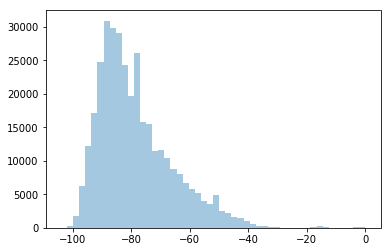

In [17]:
sns.distplot(X_stack.dropna(),kde = False) # removed all NaN values #density: how many observations were at that range

The majority of the dBm (decibels relative to one milliwatt) lies between -90 & -70.

In [18]:
# Proportion of out of range values +100 
sum(X_stack.isnull() == 0)/len(X_stack)
# 96.6% of WAP's are out of range

0.03438421681944998

Text(0.5, 0, 'Number of APs in range')

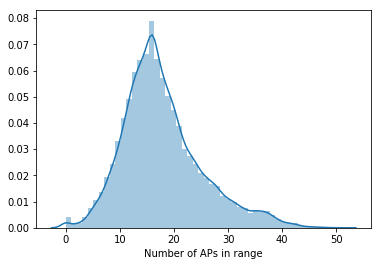

In [19]:
# WAP's which are in range
waps_in_range = (X_train
                 .notnull()
                 .sum(axis = 1))

fig, ax = plt.subplots(1,1)

sns.distplot(waps_in_range, ax = ax)
ax.set_xlabel("Number of APs in range")

Majority of the WAP's in range are between 10 & 20, with some as many as 50 WAP's in range.

In [20]:
# Remove data with 0 WAP's in range
Y_train = (Y_train
          .loc[X_train #get the rows
              .notnull() #where it is not null
              .any(axis=1),:])

X_train = (X_train
           .loc[X_train
                .notnull()
                .any(axis=1),:])

In [21]:
# Removing columns with all NaN values
all_nan = (X_train
           .isnull()
           .all(axis=0) == False)
filtered_cols = (all_nan[all_nan]
                 .index
                 .values)

X_train = X_train.loc[:,filtered_cols]
X_validation = X_validation.loc[:,filtered_cols]

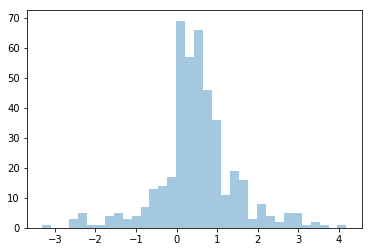

In [22]:
# Finding skewness
X_skew = X_train.skew()

sns.distplot(X_skew.dropna(),kde=False)

Generally a positive skewness can be observed between 0 & 1

In [23]:
#Normalizing the data and replaceing the NA's with the minimum RSSI value
X_exp_train = np.power(10,X_train/10,)
X_exp_validation = np.power(10,X_validation/10)

abs_min = (X_exp_train.apply(min).min())
print(abs_min)

X_exp_train.fillna(abs_min,inplace=True)
X_exp_validation.fillna(abs_min,inplace=True)

5.011872336272715e-11


In [24]:
#Describe the distribution 
def skew_score(s):
    return float(skew(s).data) #The average skewness (positive is positive skewness and vice verse)

def kurtosis_score(s):
    return kurtosis(s) #The probability in the tails (how likely it is to be extreme in the distribution)

def in_range(s):
    return (s > abs_min).sum()

X_norm = pd.DataFrame({'Sample_Size': X_exp_train.apply(in_range),
                         'Skewness': X_exp_train.apply(skew_score),
                         'Kurtosis': X_exp_train.apply(kurtosis_score),
                        })

X_norm.head(15)

,Sample_Size,Skewness,Kurtosis
WAP001,18,37.679528,1539.006258
WAP002,19,38.149577,1520.127029
WAP005,40,29.213423,956.335017
WAP006,308,48.411222,2564.925279
WAP007,578,47.423077,2462.998176
WAP008,603,23.169886,624.029531
WAP009,595,36.348336,1556.147531
WAP010,62,39.215175,1661.902874
WAP011,2756,89.906646,8469.977106
WAP012,2783,45.956507,2116.464764


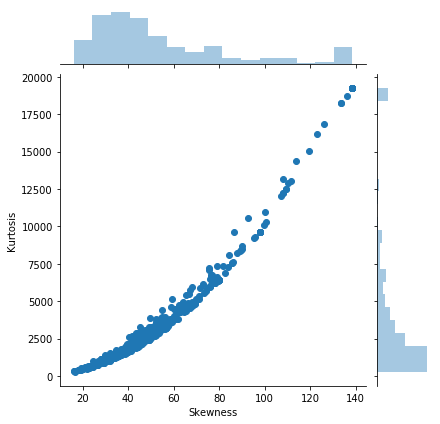

In [25]:
sns.jointplot(y="Kurtosis", x="Skewness", stat_func= None, data=X_norm)

The higher the skewness, the significantly higher kurtosis, which means that there are a few columns that have extremly heavy tails, more so than a normal distribution. (Alot of data in the tails of some points)

In [26]:
#Box-Cox Transformation which is used to transform a skewed distribution to a normal distribution
def box_cox_lambda(s):
    _, maxlog = stats.boxcox(s)
    return maxlog

lambda_bc = X_exp_train.apply(box_cox_lambda)

X_boxcox_train = X_exp_train
X_boxcox_validation = X_exp_validation

for wap in X_boxcox_train:
 
    X_boxcox_train.loc[:,wap] = stats.boxcox(X_exp_train.loc[:,wap],lmbda = lambda_bc.loc[wap])
    
    X_boxcox_validation.loc[:,wap] = stats.boxcox(X_exp_validation.loc[:,wap],lmbda = lambda_bc.loc[wap])

In [27]:
# After Box-Cox #to create the normal distribution
X_norm_post_boxcox = pd.DataFrame({'Skewness': X_boxcox_train.apply(skew_score),
                         'Kurtosis': X_boxcox_train.apply(kurtosis_score),
                         'BoxCox_Lambda': lambda_bc})

X_norm_post_boxcox.head(10)

,Skewness,Kurtosis,BoxCox_Lambda
WAP001,0.000000,-3,1.994948
WAP002,0.000000,-3,1.994948
WAP005,0.000000,-3,1.994948
WAP006,0.000000,--,-15.078907
WAP007,5.504153,28.2957,-6.766723
WAP008,5.377541,26.9179,-7.013787
WAP009,5.417215,27.3462,-5.567161
WAP010,0.000000,-3,1.994948
WAP011,2.044240,2.18865,-1.017587
WAP012,2.026338,2.11425,-1.010660


Text(0.5, 1.0, 'Post- Box-Cox')

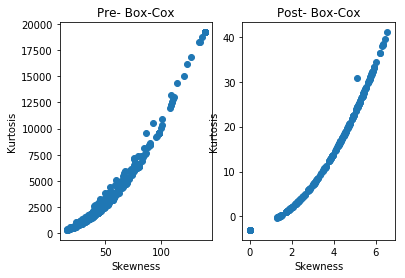

In [28]:
#Plot before and after skewness
fig, (ax1,ax2) = plt.subplots(1,2)

ax1.scatter(y="Kurtosis", x="Skewness", data=X_norm)
ax1.set_xlabel("Skewness")
ax1.set_ylabel("Kurtosis")
ax1.set_title("Pre- Box-Cox")

ax2.scatter(y="Kurtosis", x="Skewness", data=X_norm_post_boxcox)
ax2.set_xlabel("Skewness")
ax2.set_ylabel("Kurtosis")
ax2.set_title("Post- Box-Cox")

MaskError: Cannot convert masked element to a Python int.

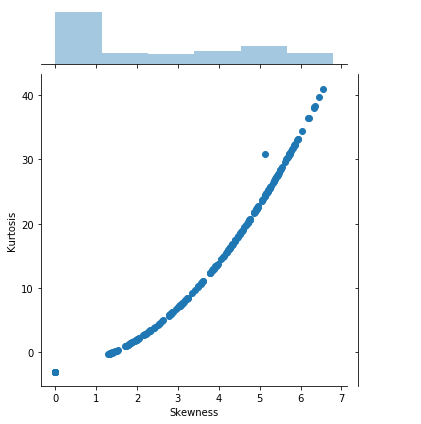

In [29]:
sns.jointplot(y="Kurtosis", x="Skewness", stat_func = None,data=X_norm_post_boxcox)

## Dimensionality reduction

In [30]:
#Feature scaling: Most models require the predictors to be on the same scale for better performancee
sc = StandardScaler() #Every value will be between 1 and -1, with an average of 0
X_std_train = sc.fit_transform(X_boxcox_train)
X_std_validation = sc.transform(X_boxcox_validation)

X_std_train = pd.DataFrame(X_std_train)
X_std_validation = pd.DataFrame(X_std_validation)

In [31]:
all_zero= ((X_std_train == 0)
           .all()==False)
filtered_cols = (all_zero[all_zero]
                 .index
                 .values)

print("Before removing predictors with only zeros", X_std_train.shape)

X_rm_train = X_std_train.loc[:,filtered_cols]
X_rm_validation = X_std_validation.loc[:,filtered_cols]

print("After removing predictors with only zeros", X_rm_train.shape)

Before removing predictors with only zeros (19227, 465)
After removing predictors with only zeros (19227, 254)


## Predictor correlations

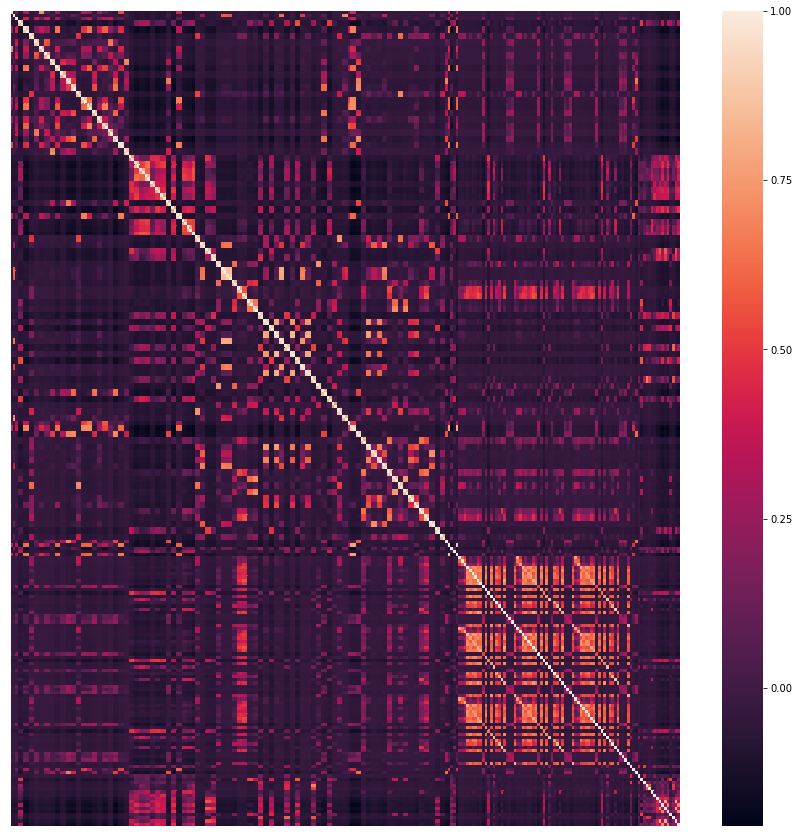

In [32]:
X_train_corr = X_rm_train.corr()

fig = plt.figure(figsize=(15,15))
sns.heatmap(X_train_corr,xticklabels=False, yticklabels=False)

In [33]:
# Assign a threshold of 0.9 and see how many predictor pairs have correlation above this threshold
corr_stack = X_train_corr.stack()
corr_thresh = 0.9

# Total entries in correlation matrix above threshold
Nthresh = (abs(corr_stack) >= corr_thresh).sum()

# Subtracting the correlation of predictor with themselves which is equal to 1
Nthresh -= 254

# Pairwise correlations appear twice in the matrix
Nthresh *= 0.5

Nthresh

19.0

Only 19 predictor pairs have correlation above our defined threshold

## Principal Component Analysis

In [34]:
#PCA reduces the dimensionality of the dataset to a handful of variables
pca = PCA()
pca.fit(X_rm_train)

PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

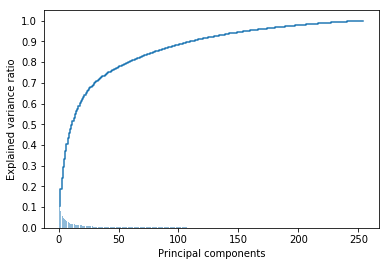

In [35]:
fig, ax = plt.subplots(1,1)

ax.bar(range(1, 255), pca.explained_variance_ratio_, alpha=0.5, align='center')
ax.step(range(1, 255), np.cumsum(pca.explained_variance_ratio_), where='mid')
ax.set_ylabel('Explained variance ratio')
ax.set_xlabel('Principal components')
ax.set_yticks(np.arange(0,1.1,0.1))

Roughly 95% of the variance is explained by the first 150 eigen vectors

Text(0, 0.5, 'Reconstruction Error')

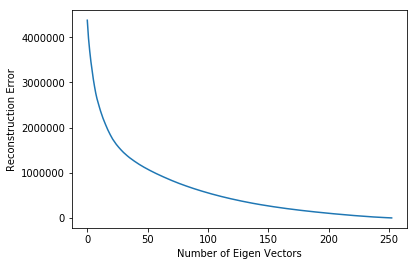

In [36]:
X_rm_train = np.array(X_rm_train)
mu = np.mean(X_rm_train,axis = 0)

recon_error = []
for nComp in range(1,X_rm_train.shape[1]):
    #pca.components_ is already sorted by explained variance
    Xrecon = np.dot(pca.transform(X_rm_train)[:,:nComp], pca.components_[:nComp,:])
    Xrecon += mu
    recon_error.append(sum(np.ravel(np.abs(Xrecon- X_rm_train)**2)))

pd.Series(recon_error).plot()
plt.xlabel("Number of Eigen Vectors")
plt.ylabel("Reconstruction Error")

## Reduce training & validation data to 150

In [37]:
Ndim_reduce = 150
X_train_pca = pca.transform(X_rm_train)[:,:Ndim_reduce]
X_validation_pca = pca.transform(X_rm_validation)[:,:Ndim_reduce]

X_train_pca.shape,X_validation_pca.shape

((19227, 150), (1111, 150))

## Setup

In [38]:
#Data collection & transformation
import datetime as dt
import time
import pickle
from sklearn.preprocessing import Imputer, StandardScaler
from itertools import cycle

#Statistical testing
import statsmodels.api as sm
from statsmodels.formula.api import ols
import scipy

#Machine learning
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import PolynomialFeatures
from sklearn.decomposition import PCA
from sklearn.model_selection import learning_curve, validation_curve
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import accuracy_score, cohen_kappa_score

#Plotting
from mlxtend.plotting import plot_learning_curves
import matplotlib
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
plt.rcParams['figure.figsize'] = [10,8]
import seaborn as sns
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

In [39]:
# X_train_pca # X_pca_crossval
# Y_train # y_crossval
# X_validation_pca # X_pca_holdout
# Y_validation # y_holdout


In [40]:
crossval_raw_df, holdout_raw_df = train_test_split(X_train, test_size = 0.1,random_state = 1)
crossval_raw_df.shape, holdout_raw_df.shape
# new dataset, consisting of 10%

((17304, 465), (1923, 465))

In [41]:
crossval_pca_df, holdout_pca_df = train_test_split(X_train_pca, test_size = 0.1,random_state = 1)
crossval_pca_df.shape,holdout_pca_df.shape

((17304, 150), (1923, 150))

In [42]:
crossval_pca_df = pd.DataFrame(crossval_pca_df,index=crossval_raw_df.index)
holdout_pca_df = pd.DataFrame(holdout_pca_df,index=holdout_raw_df.index)
# new dataframe

In [43]:
y_crossval, y_holdout = train_test_split(Y_train, test_size = 0.1,random_state = 1)
y_crossval.shape, y_holdout.shape

((17304, 6), (1923, 6))

In [44]:
crossval_raw_df.fillna(value=100,inplace=True)
holdout_raw_df.fillna(value=100,inplace=True)

In [45]:
y_crossval.head()

,LONGITUDE,LATITUDE,FLOOR,BUILDINGID,SPACEID,RELATIVEPOSITION
4363,-7445.557874,4.864827e+06,0,1,202,1
10563,-7345.423300,4.864830e+06,3,2,119,2
14478,-7317.526100,4.864795e+06,3,2,137,2
18075,-7643.428200,4.864928e+06,2,0,202,2
9134,-7659.935300,4.864939e+06,3,0,215,2


## Building EDA (Exploratory Data Analysis)

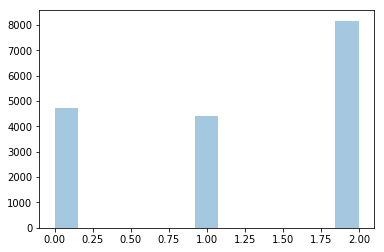

In [46]:
sns.distplot(y_crossval[['BUILDINGID']], kde=False)
# kde= kernel density estimation to estimate the probability density function of a random variable

Observations:
Building 2 has a clear majority with its count being slightly lower than Building 1.
Building 0 and 1 have roughly the same representation in the train data.

## Creating Dashboards

In [48]:
dboard = dashboard.Dashboard()
# dboard.get_preview()

In [49]:
markers = ('s', 'x', 'o', '^', 'v')
colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
cmap = ListedColormap(colors[:len(np.unique(y_crossval['BUILDINGID']))])

building_scatter = []

for idx, cl in enumerate(np.unique(y_crossval['BUILDINGID'])):

#   plt.scatter(x=y_crossval.loc[y_crossval.BUILDINGID== cl]['LATITUDE'],
#               y=y_crossval.loc[y_crossval.BUILDINGID== cl]['LONGITUDE'],
#               alpha=0.6,
#               c=cmap(idx),
#               edgecolor='black',
#               marker=markers[idx],
#               label=cl)

    trace = go.Scatter( x=y_crossval.loc[y_crossval.BUILDINGID== cl]['LATITUDE'],
                           y=y_crossval.loc[y_crossval.BUILDINGID== cl]['LONGITUDE'],                           
                           text=idx,
                           mode='markers',
                           marker=dict(size=12,
                             line=dict(width=1),
                             color=cl
                           ),
                           name=idx,
                         )
    building_scatter.append(trace)

layout = go.Layout(
    title='BUILDING LOCATIONS',
    xaxis=dict(
        title='LATITUDE',
        titlefont=dict(
            family='Courier New, monospace',
            size=18,
            color='#7f7f7f'
            )),
    yaxis=dict(
        title='LONGITUDE',
        titlefont=dict(
            family='Courier New, monospace',
            size=18,
            color='#7f7f7f'
        )
    )
)
data = building_scatter
fig = go.Figure(data=data, layout=layout)
py.iplot(fig, filename='building_locations')
    
# plt.xlabel('Latitude')
# plt.ylabel('Longitude')
# plt.legend(loc='upper right')
# plt.tight_layout()

the above plot illustrates the locations of the buildings in the campus.

In [50]:
markers = ('s', 'x', 'o', '^', 'v')
colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
cmap = ListedColormap(colors[:len(np.unique(y_crossval['BUILDINGID']))])

# iloc= item/index location
# enumerate= go through each value
building_scatter = []

for idx, cl in enumerate(np.unique(y_crossval['BUILDINGID'])):

#     print(X_train.loc[Y_train.BUILDINGID== cl].iloc[:,0])
#     plt.scatter(x=crossval_pca_df.loc[y_crossval.BUILDINGID== cl].iloc[:,0],
#                y=crossval_pca_df.loc[y_crossval.BUILDINGID== cl].iloc[:,1],
#                alpha=0.6, # alpha= how transparant something is
#                c=cmap(idx), # class map # idx = each unique building id
#                edgecolor='black',
#                marker=markers[idx],
#                label=cl)
    trace = go.Scatter( x=crossval_pca_df.loc[y_crossval.BUILDINGID== cl].iloc[:,0],
                           y=crossval_pca_df.loc[y_crossval.BUILDINGID== cl].iloc[:,1],                           
                           text=idx,
                           mode='markers',
                           marker=dict(size=12,
                             line=dict(width=1),
                             color=cl
                           ),
                           name=idx,
                         )
    building_scatter.append(trace)

layout = go.Layout(
    title='BUILDING PCA',
    xaxis=dict(
        title='PCA COMPONENT 1',
        titlefont=dict(
            family='Courier New, monospace',
            size=18,
            color='#7f7f7f'
            )),
    yaxis=dict(
        title='PCA COMPONENT 2',
        titlefont=dict(
            family='Courier New, monospace',
            size=18,
            color='#7f7f7f'
        )
    )
)
data = building_scatter
fig = go.Figure(data=data, layout=layout)
py.iplot(fig, filename='building_pca')
    
# plt.xlabel('PCA Component 1')
# plt.ylabel('PCA Component 2')
# plt.legend(loc='lower right')
# plt.tight_layout()
    

This plot illustrates how buildingID are distributed across the top two PCA dimensions. PCA is an unsupervised learning technique for dimensionality reduction. Possibility top 2 PCA components might not have explained responce variable well. 

## Floor EDA

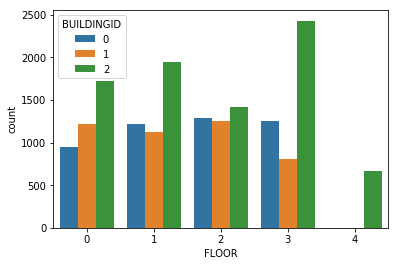

In [52]:
sns.countplot(x='FLOOR', hue='BUILDINGID', data=y_crossval, orient='v')

In [94]:
tmp_df = y_crossval.groupby(['BUILDINGID', 'FLOOR']).agg('count').reset_index()

In [95]:
tmp_df

,BUILDINGID,FLOOR,LONGITUDE,LATITUDE,SPACEID,RELATIVEPOSITION
0,0,0,950,950,950,950
1,0,1,1224,1224,1224,1224
2,0,2,1293,1293,1293,1293
3,0,3,1257,1257,1257,1257
4,1,0,1218,1218,1218,1218
5,1,1,1126,1126,1126,1126
6,1,2,1252,1252,1252,1252
7,1,3,810,810,810,810
8,2,0,1721,1721,1721,1721
9,2,1,1942,1942,1942,1942


In [98]:
tmp_df_0 = tmp_df[tmp_df['BUILDINGID'] == 0]
tmp_df_0

,BUILDINGID,FLOOR,LONGITUDE,LATITUDE,SPACEID,RELATIVEPOSITION
0,0,0,950,950,950,950
1,0,1,1224,1224,1224,1224
2,0,2,1293,1293,1293,1293
3,0,3,1257,1257,1257,1257


In [101]:
# building 0
tmp_df_0 = tmp_df[tmp_df['BUILDINGID'] == 0]
trace1 = go.Bar(
    x=tmp_df_0['FLOOR'],
    y=tmp_df_0['LONGITUDE'],
    name='0'
)
# building 1
tmp_df_1 = tmp_df[tmp_df['BUILDINGID'] == 1]
trace2 = go.Bar(
    x=tmp_df_1['FLOOR'],
    y=tmp_df_1['LONGITUDE'],
    name='1'
)

# building 2
tmp_df_2 = tmp_df[tmp_df['BUILDINGID'] == 2]
trace3 = go.Bar(
    x=tmp_df_2['FLOOR'],
    y=tmp_df_2['LONGITUDE'],
    name='2'
)

data = [trace1, trace2, trace3]
layout = go.Layout(
    barmode='group',
    
    title='FLOOR COUNT',
    xaxis=dict(
        title='FLOOR',
        titlefont=dict(
            family='Courier New, monospace',
            size=18,
            color='#7f7f7f'
            )),
    yaxis=dict(
        title='COUNT',
        titlefont=dict(
            family='Courier New, monospace',
            size=18,
            color='#7f7f7f'
        )
    )
)


fig = go.Figure(data=data, layout=layout)
py.iplot(fig, filename='grouped-bar')


In [102]:
y_crossval.head(1)

,LONGITUDE,LATITUDE,FLOOR,BUILDINGID,SPACEID,RELATIVEPOSITION
4363,-7445.557874,4.864827e+06,0,1,202,1


In [103]:
y_crossval.groupby(['FLOOR', 'BUILDINGID'])['RELATIVEPOSITION'].count()

FLOOR  BUILDINGID
0      0              950
       1             1218
       2             1721
1      0             1224
       1             1126
       2             1942
2      0             1293
       1             1252
       2             1417
3      0             1257
       1              810
       2             2431
4      2              663
Name: RELATIVEPOSITION, dtype: int64

Observations:
   1. B0 and B1 have 4 floors, whereas B2 has 5 floors.

# Classification :- Training

1. Building Classification

2. Per-Building Floor Classification

3. Lat & Long Regression

## Training data prep

In [104]:
y_crossval.head(1)

,LONGITUDE,LATITUDE,FLOOR,BUILDINGID,SPACEID,RELATIVEPOSITION
4363,-7445.557874,4.864827e+06,0,1,202,1


In [105]:
# Multivariate regression: training a regression model to output multiple variables
X_train_main = np.array(crossval_pca_df) #array is a list of values
Y_train_main =  np.array(y_crossval[['LATITUDE', 'LONGITUDE']])
Y_train_building =  np.array(y_crossval[['BUILDINGID']])
Y_train_floor =  np.array(y_crossval[['FLOOR']])

X_test_main = np.array(holdout_pca_df)
Y_test_main = y_holdout[['LATITUDE', 'LONGITUDE']]
Y_test_building = y_holdout[['BUILDINGID']]
Y_test_floor = y_holdout[['FLOOR']]

X_train_main.shape, Y_train_main.shape, Y_train_building.shape, Y_train_floor.shape, X_test_main.shape, Y_test_main.shape, Y_test_building.shape, Y_test_floor.shape

# 17874 rows, 150 columns


((17304, 150),
 (17304, 2),
 (17304, 1),
 (17304, 1),
 (1923, 150),
 (1923, 2),
 (1923, 1),
 (1923, 1))

## Plot Dictionaries

In [106]:
building_algorithms_kappa = {}
building_algorithms_accuracy = {}
floor_algorithms_kappa = {}
floor_algorithms_accuracy = {}
location_algorithms_rmse = {}
location_algorithms_rsqrd = {}

## Cross validation 

In [107]:
from sklearn.model_selection import KFold

In [108]:
kf = KFold(n_splits=10) # Define the split - into 10 folds 

In [109]:
print(len(X_train_main))
for train_index, test_index in kf.split(X_train_main):
    print('TRAIN:', len(train_index), 'TEST:', len(test_index))
    X_train, X_test = X_train_main[train_index], X_train_main[test_index]
    y_train, y_test = Y_train_main[train_index], Y_train_main[test_index]
#     print(X_train, X_test)

17304
TRAIN: 15573 TEST: 1731
TRAIN: 15573 TEST: 1731
TRAIN: 15573 TEST: 1731
TRAIN: 15573 TEST: 1731
TRAIN: 15574 TEST: 1730
TRAIN: 15574 TEST: 1730
TRAIN: 15574 TEST: 1730
TRAIN: 15574 TEST: 1730
TRAIN: 15574 TEST: 1730
TRAIN: 15574 TEST: 1730


## Building Classifier

### KNN Classification

In [110]:
from sklearn.neighbors import KNeighborsClassifier
neigh_building = KNeighborsClassifier(n_neighbors=3) # initialise model

In [111]:
r_sqr = [] # r-squared 
for train_index,test_index in kf.split(X_train_main):
    X_train, X_test = X_train_main[train_index], X_train_main[test_index]
    y_train, y_test = Y_train_building[train_index], Y_train_building[test_index]

    #train classifier for the subset of train data
    m = neigh_building.fit(X_train, y_train)


    #predict confidence for test data and append it to list
    r_sqr.append(m.score(X_test, y_test)) # append means to add another element to the list
    
# predicting against test(validation) set
pred = neigh_building.predict(X_test_main)

# get accuracy
accuracy = accuracy_score(Y_test_building, pred)
print('Accuracy:{:.2f}'.format(accuracy))

building_algorithms_accuracy['knn'] = accuracy

# get kappa score
kappa = cohen_kappa_score(Y_test_building, pred)
print('Kappa:{:.2f}'.format(kappa))

building_algorithms_kappa['knn'] = kappa

# for x in r_sqr:
#     print("R-Squared: "+ str(x))

Accuracy:1.00
Kappa:1.00


Text(0.5, 0, 'R-Squared')

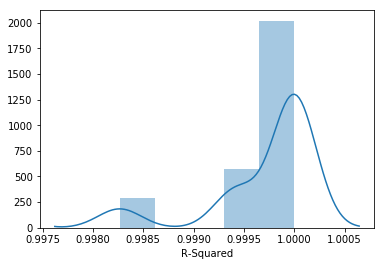

In [112]:
fig, ax = plt.subplots(1,1)

sns.distplot(r_sqr, ax = ax)
ax.set_xlabel("R-Squared")

### Random Forests Classification

In [113]:
from sklearn.ensemble import RandomForestClassifier

In [114]:
#initialise the model: to add parameters, i.e. no of estimator
RANDOM_STATE = np.random.RandomState(0)
rf_building = RandomForestClassifier(n_estimators=100, random_state=RANDOM_STATE) 

In [115]:
r_sqr = [] # r-squared 
for train_index,test_index in kf.split(X_train_main):
    X_train, X_test = X_train_main[train_index], X_train_main[test_index]
    y_train, y_test = Y_train_building[train_index], Y_train_building[test_index]

    # train classifier for the subset of train data 
    m = rf_building.fit(X_train, y_train)


    # predict confidence for test data and append it to list
    r_sqr.append(m.score(X_test, y_test)) # append means to add another element to the list

# predicting against test(validation) set
pred = rf_building.predict(X_test_main)

# get accuracy
accuracy = accuracy_score(Y_test_building, pred)
print('Accuracy:{:.2f}'.format(accuracy))

building_algorithms_accuracy['rf'] = accuracy

# get kappa score
kappa = cohen_kappa_score(Y_test_building, pred)
print('Kappa:{:.2f}'.format(kappa))

building_algorithms_kappa['rf'] = kappa

#for x in r_sqr:
    #print("R-Squared: "+ str(x))

Accuracy:1.00
Kappa:1.00


### SVM Classification

In [116]:
from sklearn.svm import SVC

In [117]:
# Initialise the model
clf_building = SVC(gamma='auto')

In [118]:
r_sqr = [] # r-squared 
for train_index,test_index in kf.split(X_train_main):
    X_train, X_test = X_train_main[train_index], X_train_main[test_index]
    y_train, y_test = Y_train_building[train_index], Y_train_building[test_index]

    # train classifier for the subset of train data 
    m = clf_building.fit(X_train, y_train)


    # predict confidence for test data and append it to list
    r_sqr.append(m.score(X_test, y_test)) # append means to add another element to the list

# predicting against test(validation) set
pred = clf_building.predict(X_test_main)

# get accuracy
accuracy = accuracy_score(Y_test_building, pred)
print('Accuracy:{:.2f}'.format(accuracy))

building_algorithms_accuracy['support_vector_machine'] = accuracy

# get kappa score
kappa = cohen_kappa_score(Y_test_building, pred)
print('Kappa:{:.2f}'.format(kappa))


building_algorithms_kappa['support_vector_machine'] = kappa

#for x in r_sqr:
    #print("R-Squared: "+ str(x))

Accuracy:1.00
Kappa:1.00


## Building - Floor Classifier

### KNN Classification

In [119]:
neigh_floor = KNeighborsClassifier(n_neighbors=3, algorithm='brute')

In [120]:
r_sqr = [] # r-squared 
for train_index,test_index in kf.split(X_train_main):
    X_train, X_test = X_train_main[train_index], X_train_main[test_index]
    y_train, y_test = Y_train_floor[train_index], Y_train_floor[test_index]

    #train classifier for the subset of train data
    m = neigh_floor.fit(X_train, y_train)


    #predict confidence for test data and append it to list
    r_sqr.append(m.score(X_test, y_test)) # append means to add another element to the list

# predicting against test(validation) set
pred = neigh_floor.predict(X_test_main)

# get accuracy
accuracy = accuracy_score(Y_test_floor, pred)
print('Accuracy:{:.2f}'.format(accuracy))

floor_algorithms_accuracy['knn'] = accuracy

# get kappa score
kappa = cohen_kappa_score(Y_test_floor, pred)
print('Kappa:{:.2f}'.format(kappa))

floor_algorithms_kappa['knn'] = kappa
    
#for x in r_sqr:
 #   print("R-Squared: "+ str(x))

Accuracy:0.98
Kappa:0.97


Text(0.5, 0, 'R-Squared')

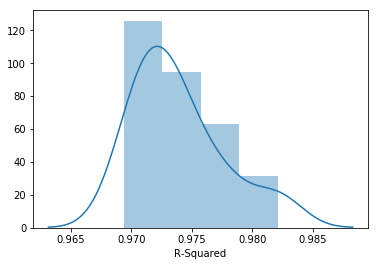

In [121]:
fig, ax = plt.subplots(1,1)

sns.distplot(r_sqr, ax = ax)
ax.set_xlabel("R-Squared")

### Random Forests Classification

In [122]:
#initialise the model: to add parameters, i.e. no of estimator
RANDOM_STATE = np.random.RandomState(0)
rf_floor = RandomForestClassifier(n_estimators=100, random_state=RANDOM_STATE) 

In [123]:
r_sqr = [] # r-squared 
for train_index,test_index in kf.split(X_train_main):
    X_train, X_test = X_train_main[train_index], X_train_main[test_index]
    y_train, y_test = Y_train_floor[train_index], Y_train_floor[test_index]

    #train classifier for the subset of train data 
    m = rf_floor.fit(X_train, y_train)


    #predict confidence for test data and append it to list
    r_sqr.append(m.score(X_test, y_test)) # append means to add another element to the list

# predicting against test(validation) set
pred = rf_floor.predict(X_test_main)

# get accuracy
accuracy = accuracy_score(Y_test_floor, pred)
print('Accuracy:{:.2f}'.format(accuracy))

floor_algorithms_accuracy['rf'] = accuracy

# get kappa score
kappa = cohen_kappa_score(Y_test_floor, pred)
print('Kappa:{:.2f}'.format(kappa))

floor_algorithms_kappa['rf'] = kappa
    
#for x in r_sqr:
 #   print("R-Squared: "+ str(x))

Accuracy:0.97
Kappa:0.97


### SVM Classification

In [124]:
# Initialise the model
clf_floor = SVC(gamma='scale')

In [125]:
r_sqr = [] # r-squared 
for train_index,test_index in kf.split(X_train_main):
    X_train, X_test = X_train_main[train_index], X_train_main[test_index]
    y_train, y_test = Y_train_building[train_index], Y_train_building[test_index]

    # train classifier for the subset of train data 
    m = clf_building.fit(X_train, y_train)


    # predict confidence for test data and append it to list
    r_sqr.append(m.score(X_test, y_test)) # append means to add another element to the list

# predicting against test(validation) set
pred = clf_building.predict(X_test_main)

# get accuracy
accuracy = accuracy_score(Y_test_building, pred)
print('Accuracy:{:.2f}'.format(accuracy))

floor_algorithms_accuracy['support_vector_machine'] = accuracy

# get kappa score
kappa = cohen_kappa_score(Y_test_building, pred)
print('Kappa:{:.2f}'.format(kappa))


floor_algorithms_kappa['support_vector_machine'] = kappa

#for x in r_sqr:
    #print("R-Squared: "+ str(x))

Accuracy:1.00
Kappa:1.00


## Latitude & Longitude Multivariate Regression

### Linear Regression 

In [126]:
from sklearn import linear_model
from sklearn.metrics import mean_squared_error

In [127]:
lm_lat = linear_model.LinearRegression(normalize=True, n_jobs=2) # initialise the model: a model is a math formalue, invoke the formalue

In [128]:
Y_test_main['LATITUDE'].values

array([4864938.7962, 4864813.2935, 4864833.4948, ..., 4864800.7843,
       4864756.556 , 4864814.5994])

In [129]:
r_sqr = [] # r-squared 
for train_index,test_index in kf.split(X_train_main):
    X_train, X_test = X_train_main[train_index], X_train_main[test_index]
    y_train, y_test = Y_train_main[train_index], Y_train_main[test_index]

    #train classifier for the subset of train data
    m = lm_lat.fit(X_train, y_train)


    #predict confidence for test data and append it to list
    r_sqr.append(m.score(X_test, y_test)) # append means to add another element to the list

# predicting against test(validation) set
pred = lm_lat.predict(X_test_main)

# get r-squared - in regression you do not use accuracy (only for classifcation) instead you use r-squared
rsqrd = lm_lat.score(X_test_main, Y_test_main)
print('R-Squared:{:.2f}'.format(rsqrd))

location_algorithms_rsqrd['linear_regression'] = rsqrd

# get the rmse
rmse = (mean_squared_error(pred, Y_test_main))/len(Y_test_main)
print('RMSE:{:.2f}'.format(rmse))

location_algorithms_rmse['linear_regression'] = rmse
    
#for x in r_sqr:
    #print("R-Squared: "+ str(x))
#     train_confidence.append(x)

R-Squared:0.93
RMSE:0.34


### KNN Regression

In [130]:
neigh_lat = KNeighborsRegressor(n_neighbors=3, p=3, leaf_size=10) # initialise the KNN model

In [131]:
r_sqr = [] # r-squared 
for train_index,test_index in kf.split(X_train_main):
    X_train, X_test = X_train_main[train_index], X_train_main[test_index]
    y_train, y_test = Y_train_main[train_index], Y_train_main[test_index]

    #train classifier for the subset of train data
    m = neigh_lat.fit(X_train, y_train)


    #predict confidence for test data and append it to list
    r_sqr.append(m.score(X_test, y_test)) # append means to add another element to the list

    
# predicting against test(validation) set
pred = neigh_lat.predict(X_test_main)

# get r-squared - in regression you do not use accuracy (only for classifcation) instead you use r-squared
rsqrd = neigh_lat.score(X_test_main, Y_test_main)
print('R-Squared:{:.2f}'.format(rsqrd))

location_algorithms_rsqrd['knn'] = rsqrd
    
# get the rmse
rmse = (mean_squared_error(pred, Y_test_main))/len(Y_test_main)
print('RMSE:{:.2f}'.format(rmse))

location_algorithms_rmse['knn'] = rmse

#for x in r_sqr:
 #   print("R-Squared: "+ str(x))
#     train_confidence.append(x)

R-Squared:1.00
RMSE:0.01


### Random Forest Regression 

In [132]:
from sklearn.ensemble import ExtraTreesRegressor

In [133]:
#initialise the model: to add parameters, i.e. no of estimator
RANDOM_STATE = np.random.RandomState(0)
rf_lat = ExtraTreesRegressor(n_estimators=100, random_state=RANDOM_STATE, bootstrap=False) 

In [134]:
r_sqr = [] # r-squared 
for train_index,test_index in kf.split(X_train_main):
    X_train, X_test = X_train_main[train_index], X_train_main[test_index]
    y_train, y_test = Y_train_main[train_index], Y_train_main[test_index]

    #train classifier for the subset of train data
    m = rf_lat.fit(X_train, y_train)


    #predict confidence for test data and append it to list
    r_sqr.append(m.score(X_test, y_test)) # append means to add another element to the list

    
# predicting against test(validation) set
pred = rf_lat.predict(X_test_main)

# get r-squared - in regression you do not use accuracy (only for classifcation) instead you use r-squared
rsqrd = rf_lat.score(X_test_main, Y_test_main)
print('R-Squared:{:.2f}'.format(rsqrd))

location_algorithms_rsqrd['random_forest'] = rsqrd

# get the rmse
rmse = (mean_squared_error(pred, Y_test_main))/len(Y_test_main)
print('RMSE:{:.2f}'.format(rmse))

location_algorithms_rmse['random_forest'] = rmse
    
#for x in r_sqr:
 #   print("R-Squared: "+ str(x))
#     train_confidence.append(x)

R-Squared:1.00
RMSE:0.02


### Decision Tree Regression

In [135]:
from sklearn.tree import DecisionTreeRegressor

In [136]:
# Initialise model
dtr_lat = DecisionTreeRegressor(max_depth=5)

In [137]:
r_sqr = [] # r-squared 
for train_index,test_index in kf.split(X_train_main):
    X_train, X_test = X_train_main[train_index], X_train_main[test_index]
    y_train, y_test = Y_train_main[train_index], Y_train_main[test_index]

    #train classifier for the subset of train data
    m = dtr_lat.fit(X_train, y_train)


    #predict confidence for test data and append it to list
    r_sqr.append(m.score(X_test, y_test)) # append means to add another element to the list

    
# predicting against test(validation) set
pred = dtr_lat.predict(X_test_main)

# get r-squared - in regression you do not use accuracy (only for classifcation) instead you use r-squared
rsqrd = dtr_lat.score(X_test_main, Y_test_main)
print('R-Squared:{:.2f}'.format(rsqrd))

location_algorithms_rsqrd['decision_tree'] = rsqrd

# get the rmse
rmse = (mean_squared_error(pred, Y_test_main))/len(Y_test_main)
print('RMSE:{:.2f}'.format(rmse))

location_algorithms_rmse['decision_tree'] = rmse
    
#for x in r_sqr:
 #   print("R-Squared: "+ str(x))
#     train_confidence.append(x)

R-Squared:0.98
RMSE:0.11


### Gradient Boosting Regressor

In [138]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.multioutput import MultiOutputRegressor

In [139]:
# initialise model: to set number of jobs to the number of cores, use n_jobs=-1
gbr_lat = MultiOutputRegressor(GradientBoostingRegressor())

In [140]:
r_sqr = [] # r-squared 
for train_index,test_index in kf.split(X_train_main):
    X_train, X_test = X_train_main[train_index], X_train_main[test_index]
    y_train, y_test = Y_train_main[train_index], Y_train_main[test_index]

    #train classifier for the subset of train data
    m = gbr_lat.fit(X_train, y_train)


    #predict confidence for test data and append it to list
    r_sqr.append(m.score(X_test, y_test)) # append means to add another element to the list

    
# predicting against test(validation) set
pred = gbr_lat.predict(X_test_main)

# get r-squared - in regression you do not use accuracy (only for classifcation) instead you use r-squared
rsqrd = gbr_lat.score(X_test_main, Y_test_main)
print('R-Squared:{:.2f}'.format(rsqrd))

location_algorithms_rsqrd['gradient_boosting_regressor'] = rsqrd

# get the rmse
rmse = (mean_squared_error(pred, Y_test_main))/len(Y_test_main)
print('RMSE:{:.2f}'.format(rmse))

location_algorithms_rmse['gradient_boosting_regressor'] = rmse
    
#for x in r_sqr:
 #   print("R-Squared: "+ str(x))
#     train_confidence.append(x)

R-Squared:0.99
RMSE:0.05


### Linear Lasso (Least absolute strinkage and selection operator) Regression

In [141]:
# Initialise model
lasso_lat = linear_model.Lasso()

In [142]:
r_sqr = [] # r-squared 
for train_index,test_index in kf.split(X_train_main):
    X_train, X_test = X_train_main[train_index], X_train_main[test_index]
    y_train, y_test = Y_train_main[train_index], Y_train_main[test_index]

    #train classifier for the subset of train data
    m = lasso_lat.fit(X_train, y_train)


    #predict confidence for test data and append it to list
    r_sqr.append(m.score(X_test, y_test)) # append means to add another element to the list

    
# predicting against test(validation) set
pred = lasso_lat.predict(X_test_main)

# get r-squared - in regression you do not use accuracy (only for classifcation) instead you use r-squared
rsqrd = lasso_lat.score(X_test_main, Y_test_main)
print('R-Squared:{:.2f}'.format(rsqrd))

location_algorithms_rsqrd['linear_lasso_regression'] = rsqrd

# get the rmse
rmse = (mean_squared_error(pred, Y_test_main))/len(Y_test_main)
print('RMSE:{:.2f}'.format(rmse))

location_algorithms_rmse['linear_lasso_regression'] = rmse
    
#for x in r_sqr:
 #   print("R-Squared: "+ str(x))
#     train_confidence.append(x)

R-Squared:0.93
RMSE:0.38


### RMSE Model Plot

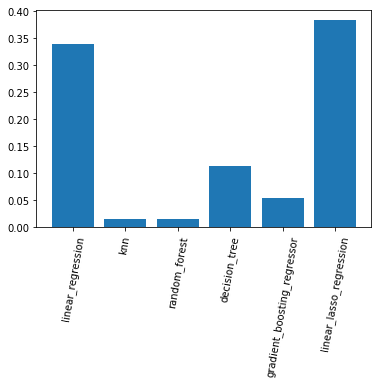

In [143]:
plt.bar(range(len(location_algorithms_rmse)), list(location_algorithms_rmse.values()))
plt.xticks(range(len(location_algorithms_rmse)), list(location_algorithms_rmse.keys()),rotation=80)
plt.show()

### R-Squared Model Plot

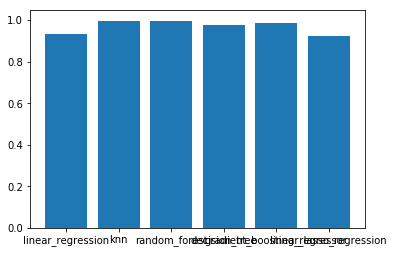

In [144]:
plt.bar(range(len(location_algorithms_rsqrd)), list(location_algorithms_rsqrd.values()))
plt.xticks(range(len(location_algorithms_rsqrd)), list(location_algorithms_rsqrd.keys()))
plt.show()

In [149]:
location_algorithms_rmse.values()

dict_values([0.3382332281639897, 0.014929690574905273, 0.015886729972145353, 0.1132669569247111, 0.054789020934042205, 0.3830429711460912])

In [151]:
# rmse models 

trace1 = go.Bar(
    x=list(location_algorithms_rmse.keys()),
    y=list(location_algorithms_rmse.values())
)

data = [trace1]
layout = go.Layout(
    title='RMSE Models',
    xaxis=dict(
        title='',
        titlefont=dict(
            family='Courier New, monospace',
            size=18,
            color='#7f7f7f'
            )),
    yaxis=dict(
        title='RMSE VALUE',
        titlefont=dict(
            family='Courier New, monospace',
            size=18,
            color='#7f7f7f'
        )
    )
)


fig = go.Figure(data=data, layout=layout)
py.iplot(fig, filename='rmse-bar')